<a href="https://colab.research.google.com/github/KingJayant/102103556_clustering/blob/main/ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus1.pkl')
data

,transcript,full_name
Death and other,Death and Other Details\nSeason 1 Episode 6\nE...,Taylor Tomlinson
Jacqueline,"In “Get on Your Knees,” Jacqueline Novak trans...",Kevin Bridges
Kevin,Kevin Bridges: The Overdue Catch-Up (2023) is ...,Jacqueline Novak
Taylor,"In her 2024 Netflix stand-up comedy special, “...",Death and other
The iron claw,The Iron Claw (2023)\nDirected by: Sean Durkin...,The iron Claw


# New Section

In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

NameError: name 'data' is not defined

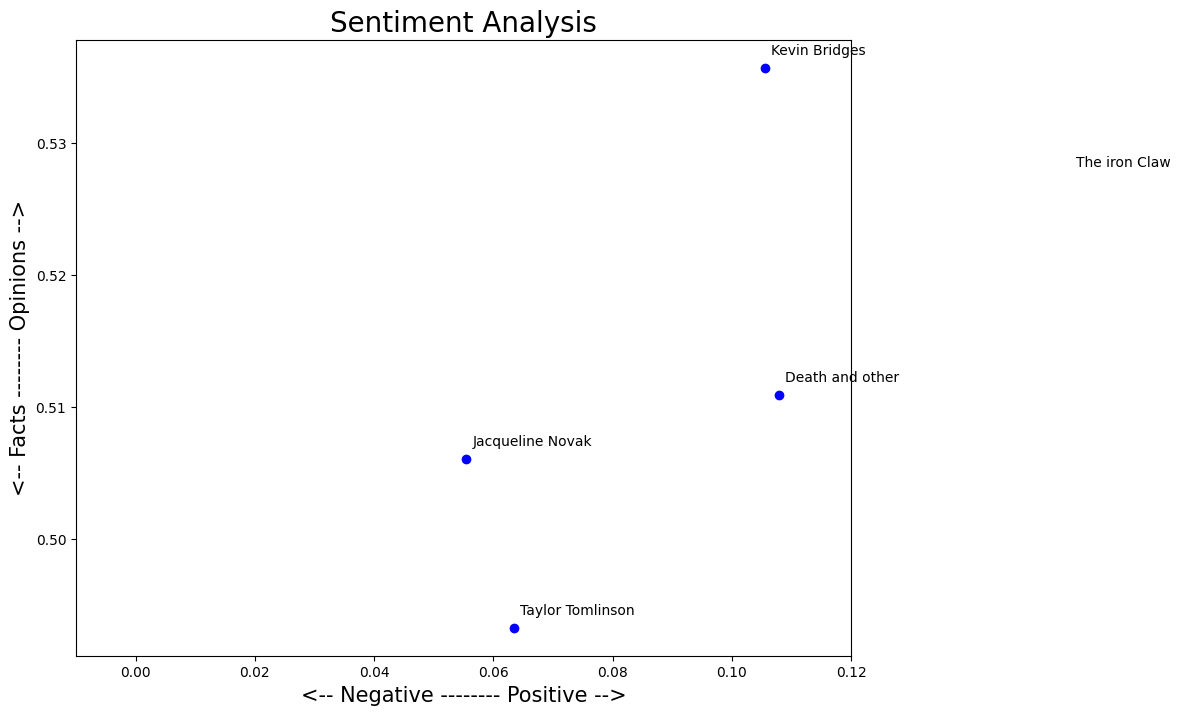

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
Death and other,Death and Other Details\nSeason 1 Episode 6\nE...,Taylor Tomlinson,0.063508,0.493297
Jacqueline,"In “Get on Your Knees,” Jacqueline Novak trans...",Kevin Bridges,0.105534,0.535733
Kevin,Kevin Bridges: The Overdue Catch-Up (2023) is ...,Jacqueline Novak,0.055490,0.506119
Taylor,"In her 2024 Netflix stand-up comedy special, “...",Death and other,0.107954,0.510958
The iron claw,The Iron Claw (2023)\nDirected by: Sean Durkin...,The iron Claw,0.156795,0.527247


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['Death and Other Details\nSeason 1 Episode 6\nEpisode Title: Tragic\nOriginal release date: February 13, 2024 (Hulu) “Tragic,” the sixth episode of Death and Other Details, begins with a glimpse into the past, showcasing Rufus’s acclaim as a detective, and quickly moves to the present where Imogene’s entanglements with Sunil deepen amidst a backdrop of espionage and surveillance orchestrated by the enigmatic Viktor Sams. The episode intricately lays out a series of events that unravel secrets and alliances. From the revelation of Sunil’s financial desperation leading to his unsavory alliance with Sams, to the unexpected murder of Alexandra, a character intent on exposing corporate malfeasance, the narrative is rich with twists. The episode weaves through various settings and character interactions, including a poignant karaoke session highlighting personal despair, a startling act of violence rooted in a misdirected quest for justice, and the tragic end of Llewellyn, a character over

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.05213744588744589,
  0.14095704948646123,
  0.02373866213151929,
  0.08266460905349794,
  -0.06011904761904763,
  0.12055623973727424,
  0.024338624338624347,
  -0.011830357142857151,
  0.06965296149323925,
  0.19916590143862872],
 [0.14161727760648624,
  0.14154385074443213,
  0.16286625874125868,
  0.045138583168244185,
  0.11157852512330117,
  0.09703249007936507,
  0.0622048161178596,
  0.05253787878787878,
  0.12788500816993464,
  0.1124304707638041],
 [0.11601814273689279,
  0.027697414192949906,
  0.006402730723382899,
  0.04575986802549301,
  0.06160286336756925,
  0.0522503644314869,
  0.10619363705077986,
  0.06413533172254103,
  0.01598988861731581,
  0.046899334208904526],
 [0.12719418960244652,
  0.18833851911976918,
  0.05319264069264071,
  0.1306377264710598,
  0.05074074074074074,
  0.05514052715887578,
  0.09195499087080718,
  0.06766609394621444,
  0.11479135664682548,
  0.18948647660818713],
 [0.1788055968915344,
  0.22959235209235204,
  0.19859875933245502,
  0.

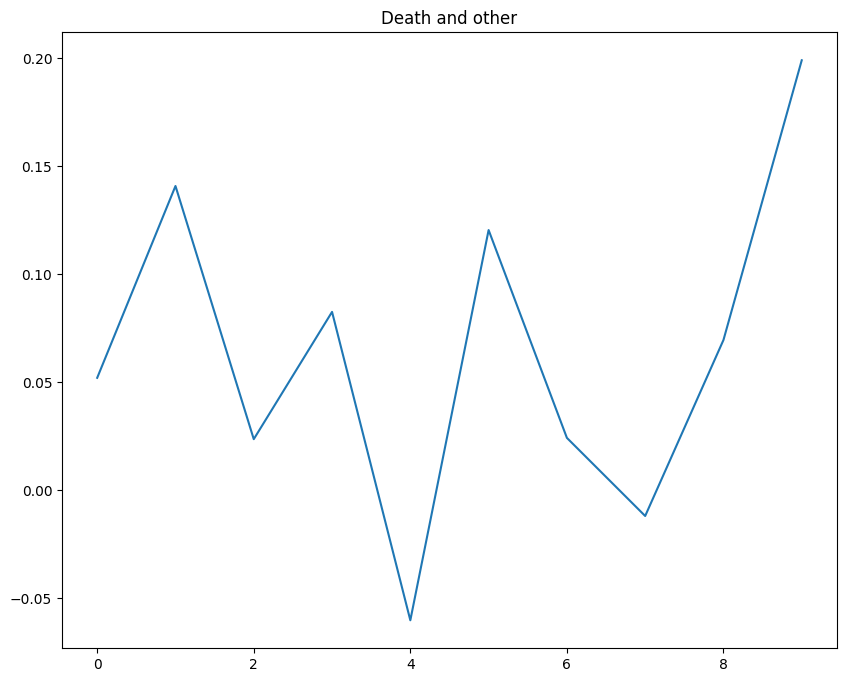

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

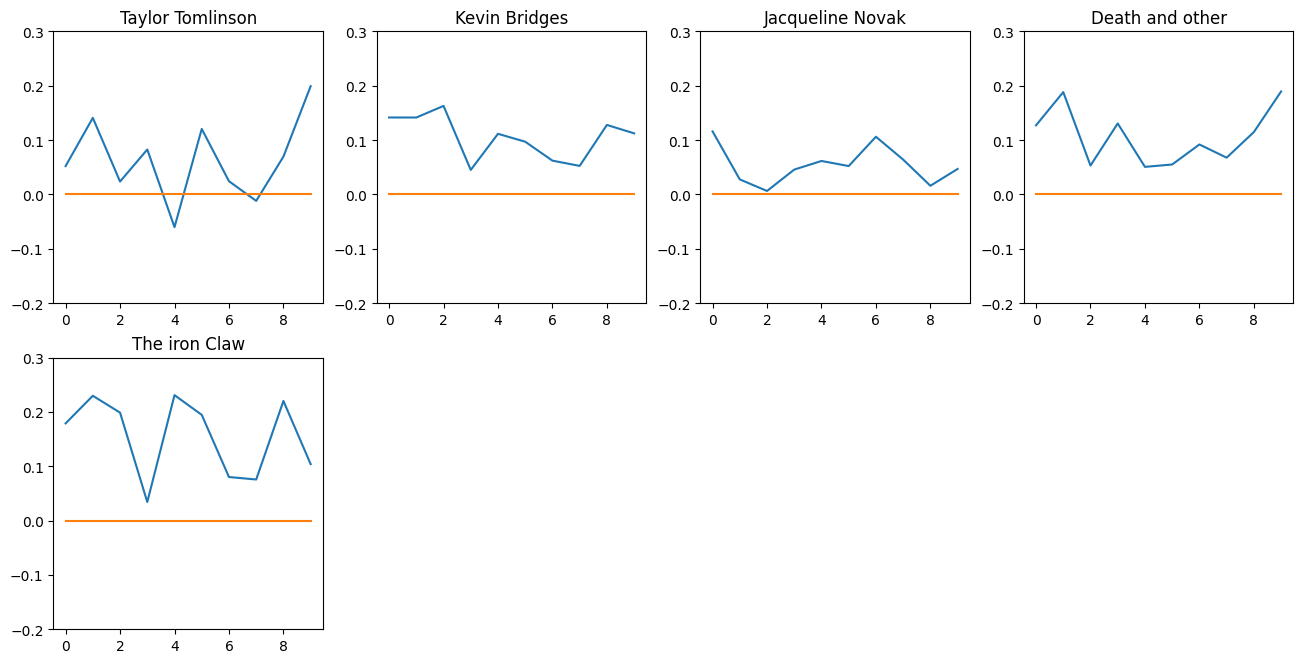

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()